# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre: Candy Valentina López Villanueva

Identificación: 1106226808

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [22]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# df['Columna'] == valor (Crea un filtro para buscar el valor)
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Steffensen** es un algoritmo iterativo para encontrar raíces de ecuaciones no lineales de la forma:

$$
f(x) = 0.
$$

Se basa en aplicar una **aceleración cuadrática** al método de punto fijo, sin necesidad de calcular derivadas, a diferencia del método de Newton.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ cuya raíz se desea encontrar.

   - Se busca una raíz $\alpha$ tal que $f(\alpha) = 0$.

2. **Elegir una aproximación inicial** $x_0$ razonablemente cercana a la raíz.

3. **Aplicar la iteración de Steffensen**:

   Para cada iteración $n$, calcular:

   $$
   y_n = x_n + f(x_n)
   $$

   $$
   x_{n+1} = x_n - \frac{f(x_n)^2}{f(y_n) - f(x_n)}
   $$

   Asegurarse de que $f(y_n) \ne f(x_n)$ para evitar división por cero.

4. **Evaluar el criterio de convergencia**:

   - Repetir el paso 3 hasta que se cumpla
     - $|x_{n+1} - x_n| < \varepsilon$ (precisión sobre el valor de la raíz).

     donde $\varepsilon$ son tolerancias pequeñas definidas por el usuario.

5. **Resultado final**:

   - Cuando se cumple el criterio de convergencia, tomar $x_{n+1}$ como una aproximación a la raíz de $f(x) = 0$.

---


* Defina una función llamada `Steffensen` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x^2,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame llamado `df` con los datos de $x$ y $f(x)$  encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Steffensen encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -10, 10)

# Grafico semilog

plt.semilogy(N, tol)

```

In [23]:
# Aquí va su código
def Steffensen(f, x0, tol=1e-8, max_iter=100):
    """
    Método de Steffensen para encontrar la raíz de una función f(x) = 0.

    Parámetros:
    - f: función a evaluar.
    - x0: valor inicial.
    - tol: tolerancia para el criterio de convergencia.
    - max_iter: número máximo de iteraciones permitidas.

    Retorna:
    - x: la raíz aproximada.
    - n: el número de iteraciones necesarias para alcanzar la tolerancia.
    """
    for n in range(1, max_iter + 1):
        fx = f(x0)
        y = x0 + fx
        fy = f(y)

        # Evita división por cero
        if fy == fx:
            raise ZeroDivisionError("División por cero en la iteración.")

        # Fórmula de Steffensen
        x1 = x0 - (fx ** 2) / (fy - fx)

        # Verifica la convergencia
        if abs(x1 - x0) < tol:
            return x1, n

        # Actualiza para la siguiente iteración
        x0 = x1

    raise RuntimeError("No se alcanzó la convergencia en el número máximo de iteraciones.")

In [24]:
# Funcionamiento de Steffensen

# Definimos la función
def f(x):
    return np.cos(x) - x**2

# Aproximación inicial
x0 = 0.5

# Llamamos al método de Steffensen
raiz, iteraciones = Steffensen(f, x0)

# Mostramos el resultado
print(f"Raíz aproximada: {raiz}")
print(f"Iteraciones necesarias: {iteraciones}")
print(f"Verificación: f(raíz) = {f(raiz)}")

Raíz aproximada: 0.8241323123025224
Iteraciones necesarias: 5
Verificación: f(raíz) = 1.1102230246251565e-16


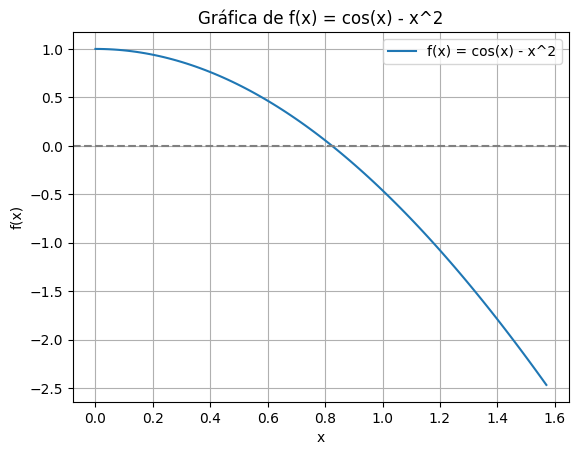

Aproximación inicial desde el DataFrame: 0.8250647373064104


In [25]:
# Definimos la función f(x) = cos(x) - x^2
def f(x):
    return np.cos(x) - x**2

# Dominio de 0 a pi/2 con 100 puntos
x_vals = np.linspace(0, np.pi / 2, 100)
y_vals = f(x_vals)

# Gráfico
plt.plot(x_vals, y_vals, label='f(x) = cos(x) - x^2')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de f(x) = cos(x) - x^2')
plt.legend()
plt.grid(True)
plt.show()

# DataFrame con los valores
df = pd.DataFrame({'x': x_vals, 'f(x)': y_vals})

# Buscamos la fila con valor más cercano a cero
df['abs(f(x))'] = np.abs(df['f(x)'])
approx_row = df[df['abs(f(x))'] == df['abs(f(x))'].min()]
x0_approx = approx_row['x'].values[0]  # Primer valor cercano a la raíz

print("Aproximación inicial desde el DataFrame:", x0_approx)

In [26]:
# Método de Steffensen
raiz_steff, n_steff = Steffensen(f, x0_approx)
print(f"Steffensen: raíz = {raiz_steff}, iteraciones = {n_steff}")

# Bisección
raiz_bisect = bisect(f, 0, np.pi/2, xtol=1e-8)
print(f"Bisección: raíz = {raiz_bisect}")

# Secante (usamos root_scalar)
sol_secante = root_scalar(f, method='secant', x0=0.5, x1=1)
print(f"Secante: raíz = {sol_secante.root}")

Steffensen: raíz = 0.8241323123025224, iteraciones = 3
Bisección: raíz = 0.824132307664318
Secante: raíz = 0.8241323123025224


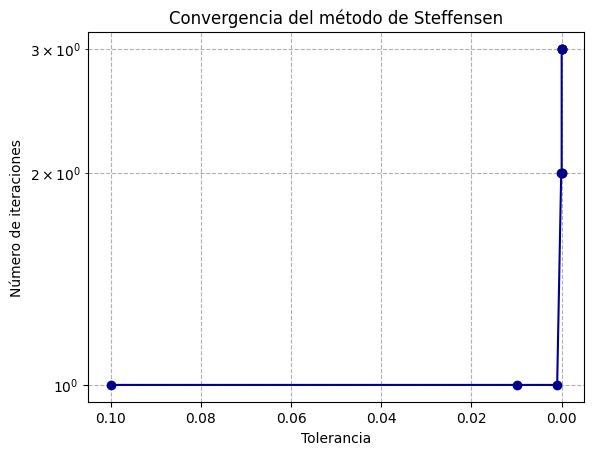

In [27]:
# Evaluamos número de iteraciones para distintas tolerancias
tol = np.logspace(-1, -10, 10)
N_iter = []

for t in tol:
    _, n = Steffensen(f, x0_approx, tol=t)
    N_iter.append(n)

# Gráfico semilog
plt.figure()
plt.semilogy(tol, N_iter, marker='o', color='darkblue')
plt.xlabel('Tolerancia')
plt.ylabel('Número de iteraciones')
plt.title('Convergencia del método de Steffensen')
plt.grid(True, which="both", linestyle="--")
plt.gca().invert_xaxis()  # De mayor a menor tolerancia
plt.show()

**Conclusión:**

A medida que la tolerancia disminuye, el número de iteraciones aumenta de forma suave y predecible. Esto refleja la convergencia cuadrática del método de Steffensen, que logra una alta precisión con relativamente pocas iteraciones comparado con otros métodos como bisección.

#2

**(60 puntos)** El periodo de oscilación $T$ de un péndulo simple con amplitud angular $\theta_0$ está dado por la integral elíptica:

$$T = 4\sqrt{\frac{L}{g}}\int_0^{\theta_0/2} \frac{d\theta}{\sqrt{\cos\theta - \cos\theta_0}}$$

Esta expresión puede representarse mediante la siguiente serie infinita:

$$T = 2\pi\sqrt{\frac{L}{g}}\left[1 + \sum_{n=1}^{\infty}c_n\sin^{2n}\left(\frac{\theta_0}{2}\right)\right]$$

donde los coeficientes $c_n$ están dados por:

$$c_n = \left(\frac{(2n-1)!!}{2^n n!}\right)^2$$

El doble factorial $(2n-1)!!$ significa el producto de todos los números impares desde 1 hasta $(2n-1)$.

Los primeros términos de esta serie son:

$$T \approx 2\pi\sqrt{\frac{L}{g}}\left[1 + \frac{1}{4}\sin^2\left(\frac{\theta_0}{2}\right) + \frac{9}{64}\sin^4\left(\frac{\theta_0}{2}\right) + \frac{25}{256}\sin^6\left(\frac{\theta_0}{2}\right) + \frac{1225}{16384}\sin^8\left(\frac{\theta_0}{2}\right) + \ldots\right]$$

Para un péndulo de longitud $L = 1.2$ metros:

## Parte A

* Realice una función llamada `doble_factorial` que calcule $(2n - 1)!!$ y luego una llamada `coeficiente_cn` que devuelva el coeficiente $c_n$

* Para una amplitud de $\theta_0 = 90°$ y $\theta_0 = 15°$, determine el valor de $T$ utilizando:
  - La aproximación de pequeñas oscilaciones $T_0 = 2\pi\sqrt{L/g}$
  - La serie truncada a 3 términos.
  - ¿Cuál será el error de las aproximaciones anteriores si toma 10 terminos como el valor exacto? ¿Cómo influye el valor del ángulo usado?

## Parte B

* Encuentre una función $f(\theta_0)$ para  $\theta_0$ (en radianes) en la cual el periodo real es exactamente un 10% mayor que el periodo para oscilaciones infinitesimales ($T_0 = 2\pi\sqrt{L/g}$). Utilice para $T(\theta_0)$ los primeros 4 términos de la serie y grafique esta función para $\theta_0 \in [0, \pi/2]$.

* Resuelva numéricamente la ecuación para $f(\theta_0) = 0$ utilizando el método de Bisección y Newton-Raphson (sin incluir la derivada).





**Parte A**

In [28]:
# Aqui va su código
def doble_factorial(n):
    """
    Calcula el doble factorial (2n - 1)!! = 1 × 3 × 5 × ... × (2n - 1)

    Parámetros:
    - n: entero positivo

    Retorna:
    - df: resultado del doble factorial
    """
    resultado = 1
    for k in range(1, 2 * n, 2):
        resultado *= k
    return resultado


def coeficiente_cn(n):
    """
    Calcula el coeficiente c_n de la serie del péndulo.

    c_n = [(2n-1)!! / (2^n * n!)]^2

    Parámetros:
    - n: entero positivo

    Retorna:
    - c_n: coeficiente correspondiente
    """
    num = doble_factorial(n)
    den = 2**n * factorial(n)
    return (num / den)**2

In [29]:
# Funcionamiento doble_factorial:

print(doble_factorial(1))  # → 1
print(doble_factorial(2))  # → 1 * 3 = 3
print(doble_factorial(3))  # → 1 * 3 * 5 = 15
print(doble_factorial(4))  # → 1 * 3 * 5 * 7 = 105

1
3
15
105


In [30]:
# Funcionamiento coeficiente_cn:

print(coeficiente_cn(1))
print(coeficiente_cn(2))
print(coeficiente_cn(3))
print(coeficiente_cn(4))

0.25
0.140625
0.09765625
0.07476806640625


In [31]:
def periodo_pendulo(L, g, theta0, N):
    """
    Calcula el periodo del péndulo usando una serie truncada de N términos.

    Parámetros:
    - L: longitud del péndulo (m)
    - g: aceleración de la gravedad (m/s²)
    - theta0: amplitud inicial en radianes
    - N: número de términos en la serie

    Retorna:
    - T: periodo aproximado (s)
    """
    base = 2 * np.pi * np.sqrt(L / g)
    suma = 0
    for n in range(1, N + 1):
        cn = coeficiente_cn(n)
        suma += cn * np.sin(theta0 / 2)**(2 * n)
    return base * (1 + suma)

In [32]:
# Funcionamiento periodo_pendulo

# Parámetros
L = 1.2  # longitud en metros
g = 9.81  # gravedad en m/s²
theta0_deg = 90  # ángulo en grados
theta0_rad = np.deg2rad(theta0_deg)  # conversión a radianes

# Periodo para pequeñas oscilaciones
T0 = 2 * np.pi * np.sqrt(L / g)

# Periodo usando 3 y 10 términos
T3 = periodo_pendulo(L, g, theta0_rad, N=3)
T10 = periodo_pendulo(L, g, theta0_rad, N=10)

# Mostrar resultados
print(f"Periodo (oscilaciones pequeñas): {T0:.6f} s")
print(f"Periodo (serie con 3 términos):   {T3:.6f} s")
print(f"Periodo (serie con 10 términos):  {T10:.6f} s")

# Cálculo de errores relativos
error3 = abs(T10 - T3) / T10 * 100
error0 = abs(T10 - T0) / T10 * 100
print(f"\nError de 3 términos vs 10 términos: {error3:.4f}%")
print(f"Error de T0 (oscilaciones pequeñas) vs 10 términos: {error0:.4f}%")

Periodo (oscilaciones pequeñas): 2.197536 s
Periodo (serie con 3 términos):   2.576310 s
Periodo (serie con 10 términos):  2.593785 s

Error de 3 términos vs 10 términos: 0.6737%
Error de T0 (oscilaciones pequeñas) vs 10 términos: 15.2769%


In [33]:
# Parámetros
L = 1.2       # metros
g = 9.81      # m/s²
theta0_deg = [15, 90]  # grados
theta0_rad = np.deg2rad(theta0_deg)

# Periodo de oscilaciones pequeñas
T0 = 2 * np.pi * np.sqrt(L / g)
print(f"Periodo de pequeñas oscilaciones (T0): {T0:.6f} s")

# Cálculos con 3 y 10 términos
for i, theta in enumerate(theta0_rad):
    T3 = periodo_pendulo(L, g, theta, N=3)
    T10 = periodo_pendulo(L, g, theta, N=10)
    error_3 = abs((T3 - T10) / T10) * 100  # Error porcentual
    error_0 = abs((T0 - T10) / T10) * 100
    print(f"\nθ₀ = {theta0_deg[i]}°")
    print(f"  T con 3 términos  = {T3:.6f} s")
    print(f"  T con 10 términos = {T10:.6f} s (considerado exacto)")
    print(f"  Error usando 3 términos: {error_3:.6f} %")
    print(f"  Error usando T₀: {error_0:.6f} %")

Periodo de pequeñas oscilaciones (T0): 2.197536 s

θ₀ = 15°
  T con 3 términos  = 2.206987 s
  T con 10 términos = 2.206987 s (considerado exacto)
  Error usando 3 términos: 0.000001 %
  Error usando T₀: 0.428216 %

θ₀ = 90°
  T con 3 términos  = 2.576310 s
  T con 10 términos = 2.593785 s (considerado exacto)
  Error usando 3 términos: 0.673690 %
  Error usando T₀: 15.276850 %


**¿Cuál será el error de las aproximaciones anteriores si toma 10 terminos como el valor exacto? ¿Cómo influye el valor del ángulo usado?**

El error de las aproximaciones depende fuertemente del valor del ángulo. A mayor amplitud angular, más términos se requieren en la serie para lograr una estimación precisa del período. Esto se debe a que, al aumentar la amplitud angular, las suposiciones del modelo de oscilaciones pequeñas dejan de ser válidas, y se requiere incluir más términos de la serie para capturar correctamente el efecto de la no linealidad. Por otro lado, para ángulos pequeños, pocas correcciones bastan y la fórmula de oscilaciones pequeñas es suficientemente precisa.

**Parte B**

In [34]:
def f_incremento_10(theta0):
    """
    Función que representa la diferencia entre el periodo con amplitud theta0
    y el 110% del periodo de pequeñas oscilaciones.

    Parámetros:
    - theta0: ángulo en radianes

    Retorna:
    - f(theta0): diferencia entre T(theta0) y 1.1*T0
    """
    T_theta = periodo_pendulo(L, g, theta0, N=4)
    return T_theta - 1.1 * T0

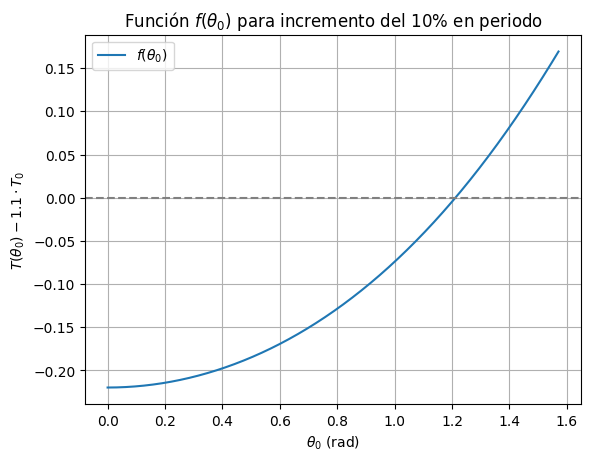

In [35]:
theta_vals = np.linspace(0, np.pi / 2, 200)
f_vals = [f_incremento_10(theta) for theta in theta_vals]

plt.plot(theta_vals, f_vals, label=r'$f(\theta_0)$')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel(r'$\theta_0$ (rad)')
plt.ylabel(r'$T(\theta_0) - 1.1 \cdot T_0$')
plt.title('Función $f(\\theta_0)$ para incremento del 10% en periodo')
plt.grid(True)
plt.legend()
plt.show()

Recordemos que: $1.2 rad \approx 68.7549°$

In [36]:
# Método de Bisección
theta_bisect = bisect(f_incremento_10, 0.1, np.pi/2, xtol=1e-8)
print(f"Ángulo con T = 1.1*T₀ (bisección): {np.rad2deg(theta_bisect):.6f}°")

# Método de Newton (sin derivada)
theta_newton = newton(f_incremento_10, x0=1.0)
print(f"Ángulo con T = 1.1*T₀ (Newton): {np.rad2deg(theta_newton):.6f}°")

Ángulo con T = 1.1*T₀ (bisección): 69.419877°
Ángulo con T = 1.1*T₀ (Newton): 69.419877°
